# Asignar etiquetado de clases (enfermo, estres_leve, saludable)

In [2]:
import sys
import os

# Agrega la raíz del proyecto al path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [ ]:
# Importación de librerías
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from IPython.display import display

# Importación de librerías personalizadas

from scripts.etiqueta_kmeans import etiquetar_con_kmeans

#Cargue de datos preprocesados despúes de EDA

csv_input = "../data/labels2.csv"
csv_output = "../data/labels2_kmeans.csv"

# 1. Carga el CSV con las etiquetas automáticas
df_sensores_prep = etiquetar_con_kmeans(csv_input, csv_output)


Dataset con etiquetas KMeans guardado en: ../data/labels2_kmeans.csv

Distribución de etiquetas KMeans:
etiqueta_kmeans
enfermo        5769
saludable      5256
estres_leve    3160
Name: count, dtype: int64


In [ ]:

# 1) Carga provisional del CSV (sin sobreescribir todavía)
df = pd.read_csv(csv_output, parse_dates=["timestamp_imagen","timestamp_sens"])

# 2) Conteo de nulos por columna
print("Nulos por columna:")
print(df[["imagen","timestamp_imagen","timestamp_sens","DO_mgL","pH","etiqueta_kmeans"]]
      .isna().sum())

# 3) Ver filas con al menos un nulo en esas columnas
mask_nulos = df[["imagen","timestamp_imagen","timestamp_sens","DO_mgL","pH","etiqueta_kmeans"]]\
             .isna().any(axis=1)
print(f"\nFilas con datos nulos ({mask_nulos.sum()}):")
print(df[mask_nulos].head(10))   # muestra las primeras 10 para inspección


Nulos por columna:
imagen               0
timestamp_imagen     0
timestamp_sens      12
DO_mgL              12
pH                  12
etiqueta_kmeans     12
dtype: int64

Filas con datos nulos (12):
                            imagen  ... etiqueta_kmeans
14185  2021-11-18_15-30-25_35s.jpg  ...             NaN
14186  2021-11-18_15-30-25_50s.jpg  ...             NaN
14187  2021-11-18_15-30-25_45s.jpg  ...             NaN
14188  2021-11-18_15-30-25_40s.jpg  ...             NaN
14189  2021-11-18_15-30-25_30s.jpg  ...             NaN
14190  2021-11-18_15-30-25_55s.jpg  ...             NaN
14191  2021-11-18_15-30-25_20s.jpg  ...             NaN
14192  2021-11-18_15-30-25_15s.jpg  ...             NaN
14193  2021-11-18_15-30-25_10s.jpg  ...             NaN
14194   2021-11-18_15-30-25_0s.jpg  ...             NaN

[10 rows x 10 columns]


In [10]:
# 4) OPCIÓN A: Eliminar todas las filas con nulos críticos
csv_output_limpio =  "../data/labels2_kmeans_limpio.csv"

df_clean = df.dropna(subset=["imagen","timestamp_imagen","timestamp_sens","DO_mgL","pH","etiqueta_kmeans"])
print(f"\nTras eliminar nulos: {len(df_clean)} filas (antes {len(df)})")

# 5) OPCIÓN B: Re-etiquetar etiquetas faltantes como 'sin_dato'
#    (descomenta si prefieres esta estrategia en vez de eliminar)
# df["etiqueta_kmeans"] = df["etiqueta_kmeans"].fillna("sin_dato")
# df_clean = df

# 6) Guardar el CSV definitivo
df_clean.to_csv(csv_output_limpio, index=False)
print(f"\nCSV limpio guardado como: {csv_output_limpio}")


Tras eliminar nulos: 14185 filas (antes 14197)

CSV limpio guardado como: ../data/labels2_kmeans_limpio.csv


### Análisis del dataset generado 

Primeras filas del dataset etiquetado:


,imagen,timestamp_imagen,timestamp_sens,temperatura,pH,conductividad,TDS,DO_mgL,etiqueta,etiqueta_kmeans
0,2021-11-17_12-46-57_0s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,0.718954,0.981818,0.0625,0.125,0.325581,estres_leve,enfermo
1,2021-11-17_12-46-57_5s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,0.718954,0.981818,0.0625,0.125,0.325581,estres_leve,enfermo
2,2021-11-17_12-46-57_55s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,0.718954,0.981818,0.0625,0.125,0.325581,estres_leve,enfermo
3,2021-11-17_12-46-57_50s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,0.718954,0.981818,0.0625,0.125,0.325581,estres_leve,enfermo
4,2021-11-17_12-46-57_40s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,0.718954,0.981818,0.0625,0.125,0.325581,estres_leve,enfermo



Distribución de etiquetas KMeans:
etiqueta_kmeans
enfermo        5769
saludable      5256
estres_leve    3160
Name: count, dtype: int64


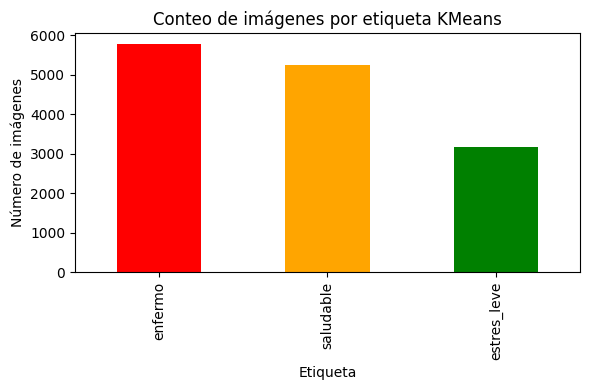

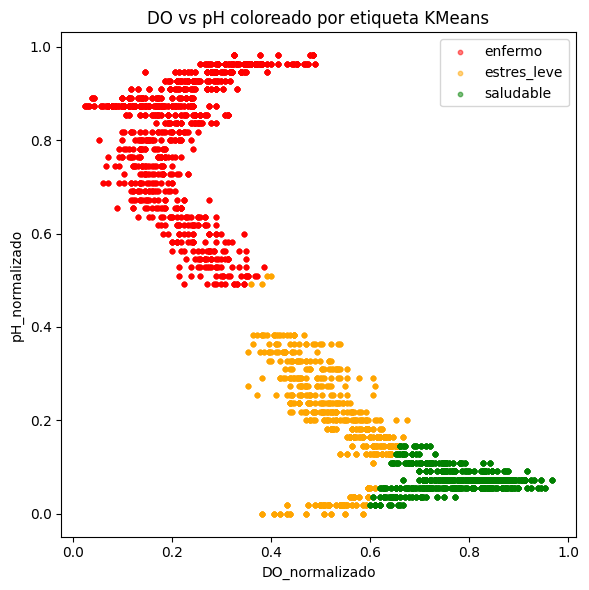

In [ ]:

# 1) Cargar dataset etiquetado
df = pd.read_csv(csv_output_limpio, parse_dates=["timestamp_imagen","timestamp_sens"])

# 2) Mostrar primeras filas
print("Primeras filas del dataset etiquetado:")
display(df.head())

# 3) Distribución de etiquetas
counts = df["etiqueta_kmeans"].value_counts()
print("\nDistribución de etiquetas KMeans:")
print(counts)

# 4) Gráfica de barras de distribución
plt.figure(figsize=(6,4))
counts.plot(kind="bar", color=["red","orange","green"])
plt.title("Conteo de imágenes por etiqueta KMeans")
plt.xlabel("Etiqueta")
plt.ylabel("Número de imágenes")
plt.tight_layout()
plt.show()

# 5) Scatter DO vs pH
plt.figure(figsize=(6,6))
colors = {"enfermo":"red","estres_leve":"orange","saludable":"green"}
for et, c in colors.items():
    sub = df[df["etiqueta_kmeans"]==et]
    plt.scatter(sub["DO_mgL"], sub["pH"], c=c, label=et, alpha=0.5, s=10)
plt.xlabel("DO_normalizado")
plt.ylabel("pH_normalizado")
plt.title("DO vs pH coloreado por etiqueta KMeans")
plt.legend()
plt.tight_layout()
plt.show()

